In [6]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image.dataframe_iterator import DataFrameIterator
from tensorflow.keras.models import load_model
import seaborn as sn
import itertools
import os
import shutil
import random
import cv2
import glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [79]:
model  = load_model('/Users/yusuf/Downloads/models/ResNet50.model.h5')

In [61]:
layer = model.layers #Conv layers at 1, 3, 6, 8, 11, 13, 15
filters = model.layers[4].get_weights()
print(layer[1].name, filters.shape)

[]

In [80]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [81]:
filters =  model.layers[3].get_weights()

In [12]:
import visualkeras

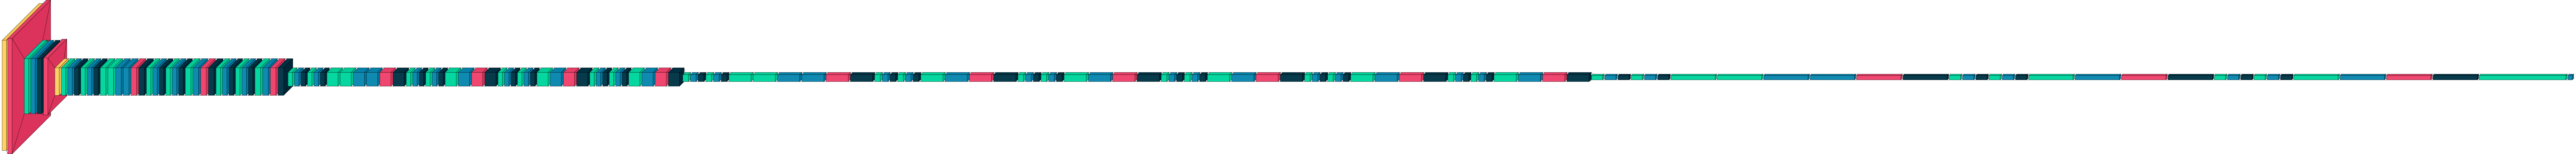

In [13]:
visualkeras.layered_view(model, to_file='output.png') # write to disk

In [14]:
# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [86]:
from tensorflow.keras import applications
tf.compat.v1.disable_eager_execution()
# build the VGG16 network
model = applications.VGG16(include_top=False,
                           weights='imagenet')

# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])


INFO:tensorflow:Disabling eager execution


In [22]:
!pwd

/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments


In [95]:
from PIL import Image
basepath  =  os.getcwd()
f = os.path.join(basepath,'basedata/test/1.jpg')
input_img =  plt.imread(f)

In [28]:
input_img.shape

(183, 275, 3)

In [34]:
len(model.layers)

19

In [67]:
layer = model.layers #Conv layers at 1, 3, 6, 8, 11, 13, 15
filters, biases = model.layers[1].get_weights()
print(layer[1].name, filters.shape)

block1_conv1 (3, 3, 3, 64)


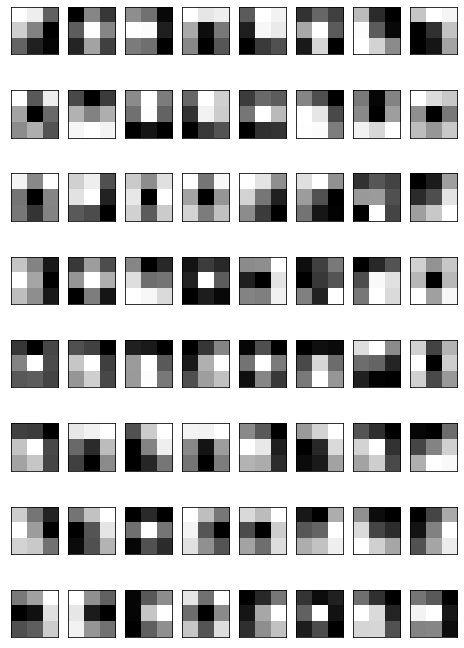

In [68]:
fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()  

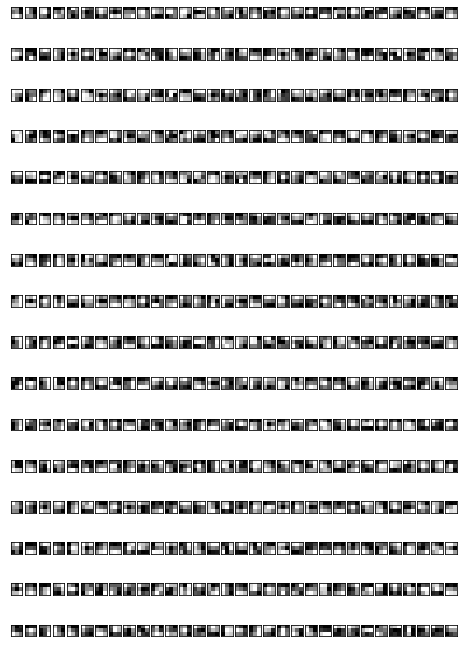

In [78]:
filters, biases = model.layers[12].get_weights()
fig1=plt.figure(figsize=(8, 12))
columns = 32
rows = 16
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()  

In [87]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [88]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()

In [89]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

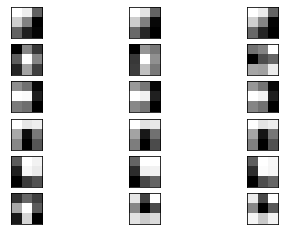

In [91]:
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()

In [93]:
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [107]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
# load the image with the required shape
img = load_img(f, target_size=(224, 224))

In [109]:
# convert the image to an array
img =img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)

In [111]:
# Generate feature output by predicting on the input image
feature_output = model.predict(img)

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [113]:
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

NameError: name 'preprocess_input' is not defined